# Statistical Machine Learning Project (Group 54)

In [23]:
!pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\denni\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [25]:
# Import the dataset
df = pd.read_csv('training_data_ht2025.csv')

In [26]:
# Step 3 — Inspect structure and sample rows
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nData types and non-null counts:")
print(df.info())
display(df.head())

Shape: (1600, 16)

Columns: ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'increase_stock']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  wind

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


 ### Data Cleaning

In [27]:

display(df.head())

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [28]:
# Converting only binary state columns to categorical type
categorical_cols = ['holiday', 'weekday', 'summertime']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Converting Ordinals into Ordinal Categories
df['hour_of_day'] = pd.Categorical(df['hour_of_day'],
                                   categories=list(range(0, 24)),
                                   ordered=True)

df['day_of_week'] = pd.Categorical(df['day_of_week'],
                                   categories=list(range(0, 7)),  # 0 = Monday ... 6 = Sunday 
                                   ordered=True)

df['month'] = pd.Categorical(df['month'],
                             categories=list(range(1, 13)),  # 1 = January ... 12 = December
                             ordered=True)

# Encode target variable (1 = high demand, 0 = low demand) and treat as category
df['increase_stock'] = df['increase_stock'].map({
    'high_bike_demand': 1,
    'low_bike_demand': 0
}).astype('category')


In [29]:
print("\n" + "=" * 70)
print("UNIQUE VALUES COUNT FOR EACH COLUMN")
print("=" * 70)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values (dtype: {df[col].dtype})")


UNIQUE VALUES COUNT FOR EACH COLUMN
hour_of_day: 24 unique values (dtype: category)
day_of_week: 7 unique values (dtype: category)
month: 12 unique values (dtype: category)
holiday: 2 unique values (dtype: category)
weekday: 2 unique values (dtype: category)
summertime: 2 unique values (dtype: category)
temp: 343 unique values (dtype: float64)
dew: 313 unique values (dtype: float64)
humidity: 1431 unique values (dtype: float64)
precip: 126 unique values (dtype: float64)
snow: 1 unique values (dtype: int64)
snowdepth: 41 unique values (dtype: float64)
windspeed: 281 unique values (dtype: float64)
cloudcover: 232 unique values (dtype: float64)
visibility: 83 unique values (dtype: float64)
increase_stock: 2 unique values (dtype: category)


We can see that the snow only has 1 unique value, therefore, it is not useful and we should drop it.


In [30]:
# Dropping duplicates
dup_count = df.duplicated().sum()
if dup_count:
    df = df.drop_duplicates().reset_index(drop=True)


In [31]:
# Drop redundant column 'snow' since all zeros 
if 'snow' in df.columns:
    if df['snow'].nunique() == 1 and df['snow'].iloc[0] == 0:
        df = df.drop(columns=['snow'])
        print("Dropped 'snow' column (all values = 0).")
    else:
        print("'snow' column kept (not all values are zero).")

Dropped 'snow' column (all values = 0).


In [32]:
# Integrity Checks
print("Shape:", df.shape)
print("Duplicates removed:", dup_count)
print("\nTarget distribution (increase_stock):")
print(df['increase_stock'].value_counts(dropna=False))

print("\nDtypes:")
print(df.dtypes)

Shape: (1600, 15)
Duplicates removed: 0

Target distribution (increase_stock):
increase_stock
0    1312
1     288
Name: count, dtype: int64

Dtypes:
hour_of_day       category
day_of_week       category
month             category
holiday           category
weekday           category
summertime        category
temp               float64
dew                float64
humidity           float64
precip             float64
snowdepth          float64
windspeed          float64
cloudcover         float64
visibility         float64
increase_stock    category
dtype: object


### Exploratory Data Analysis

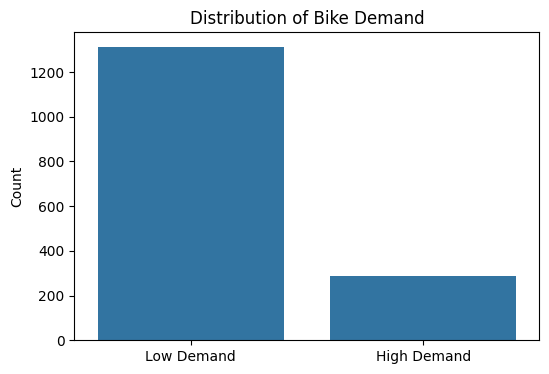

In [33]:
plt.figure(figsize=(6,4))
sb.countplot(x='increase_stock', data=df)
plt.title("Distribution of Bike Demand")
plt.xticks([0, 1], ['Low Demand', 'High Demand'])
plt.xlabel("")
plt.ylabel("Count")
plt.show()

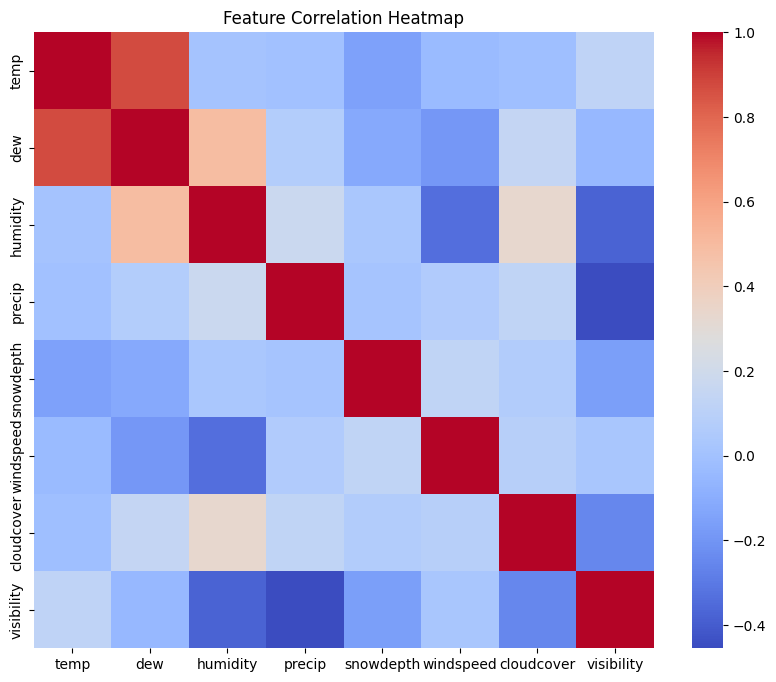

In [34]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sb.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

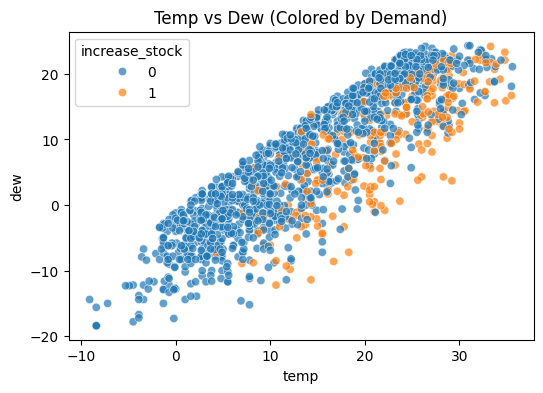

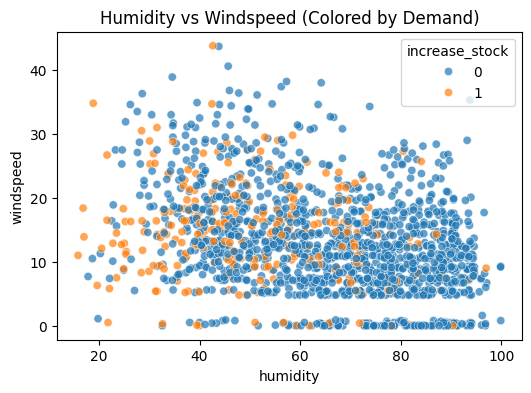

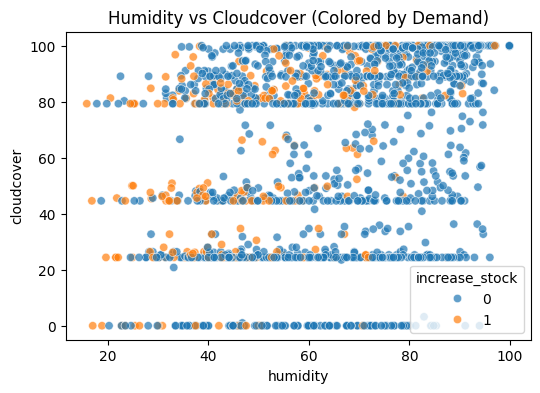

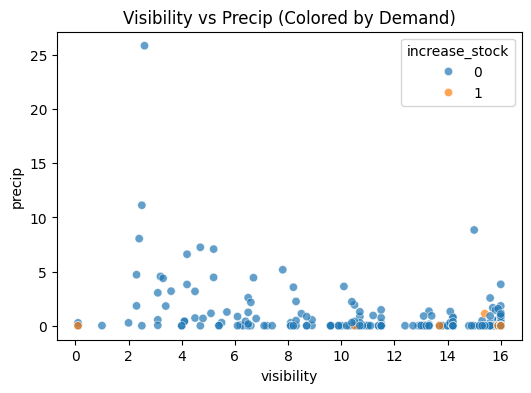

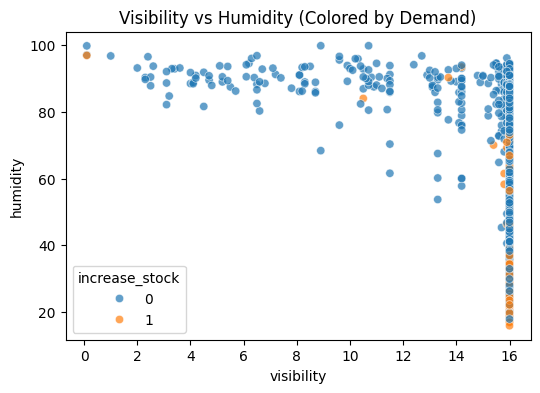

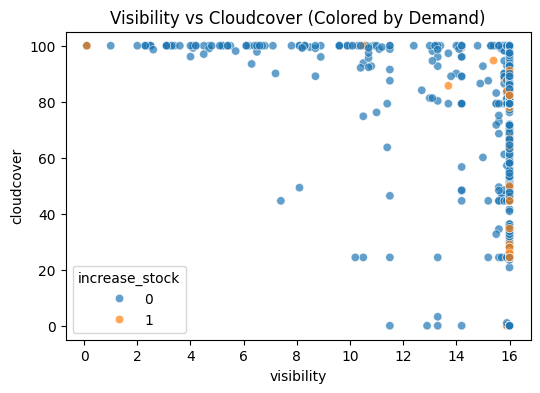

In [35]:
pairs_to_plot = [
    ("temp", "dew"),
    ("humidity", "windspeed"),
    ("humidity", "cloudcover"),
    ("visibility", "precip"),
    ("visibility", "humidity"),
    ("visibility", "cloudcover")
]

for x, y in pairs_to_plot:
    plt.figure(figsize=(6,4))
    sb.scatterplot(data=df, x=x, y=y, hue='increase_stock', alpha=0.7)
    plt.title(f"{x.capitalize()} vs {y.capitalize()} (Colored by Demand)")
    plt.show()

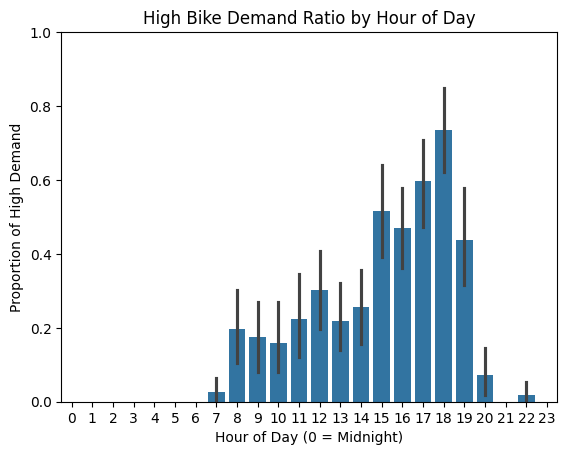

In [36]:
# Demand vs Hour of Day
sb.barplot(x='hour_of_day', y='increase_stock', data=df, estimator=lambda x: sum(x)/len(x)  
)

plt.title("High Bike Demand Ratio by Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight)")
plt.ylabel("Proportion of High Demand")
plt.ylim(0, 1)
plt.show()


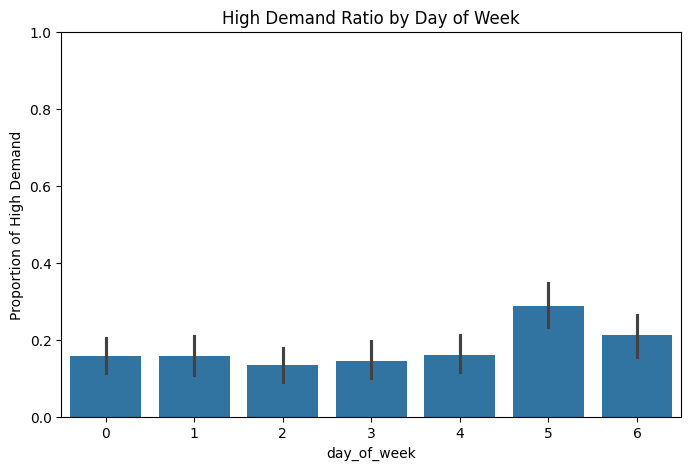

In [37]:
# Demand vs Day of Week
plt.figure(figsize=(8,5))
sb.barplot(x='day_of_week', y='increase_stock', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("High Demand Ratio by Day of Week")
plt.ylabel("Proportion of High Demand")
plt.ylim(0, 1)
plt.show()

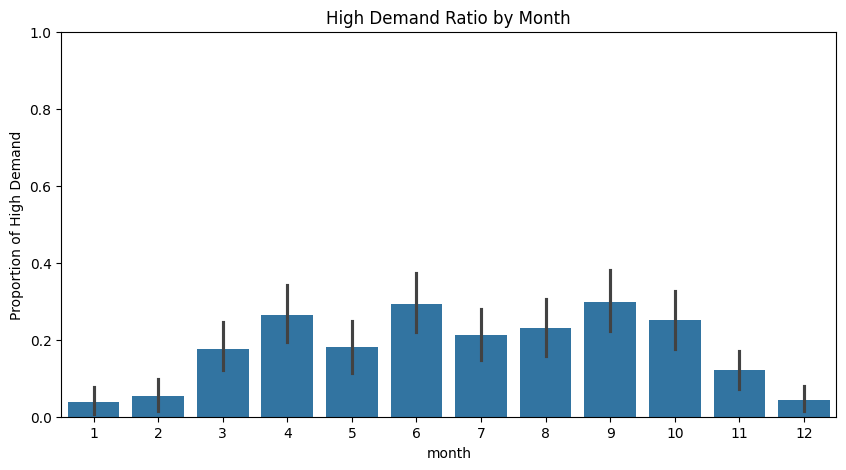

In [38]:
# Demand vs Month
plt.figure(figsize=(10,5))
sb.barplot(x='month', y='increase_stock', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("High Demand Ratio by Month")
plt.ylabel("Proportion of High Demand")
plt.ylim(0, 1)
plt.show()

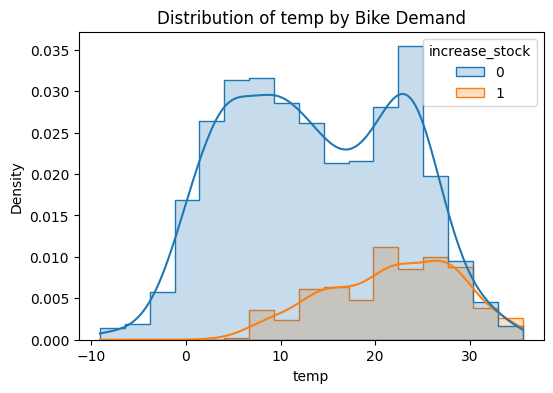

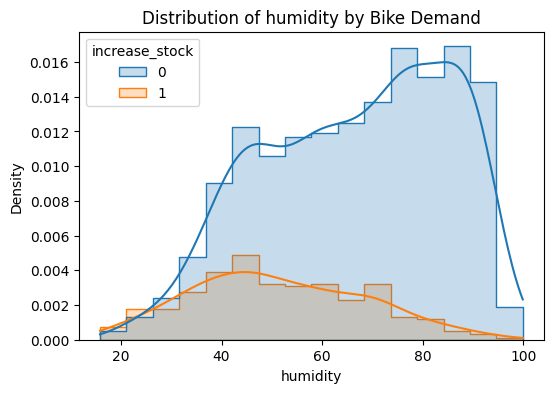

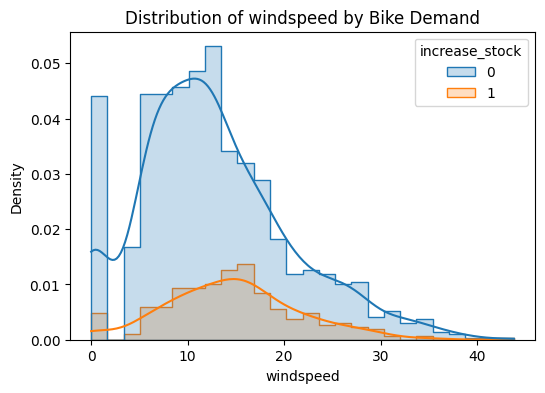

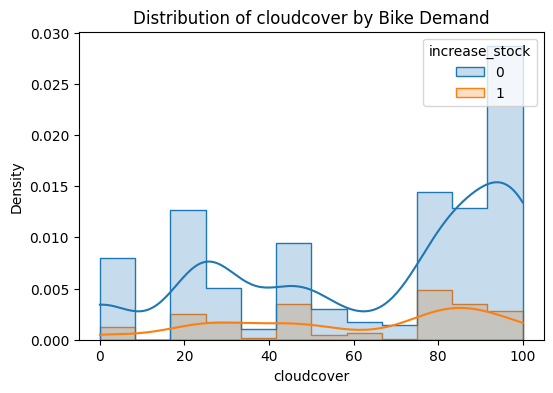

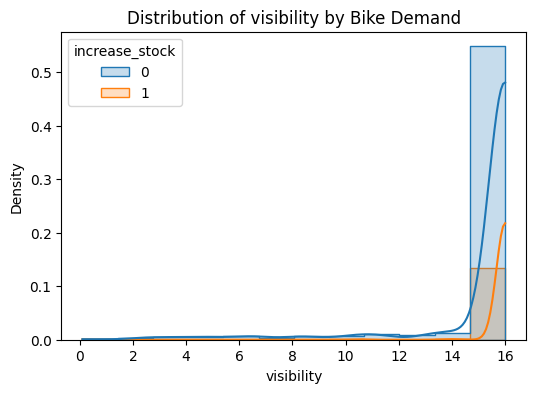

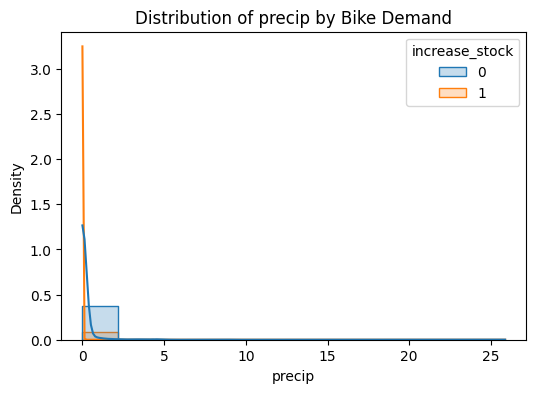

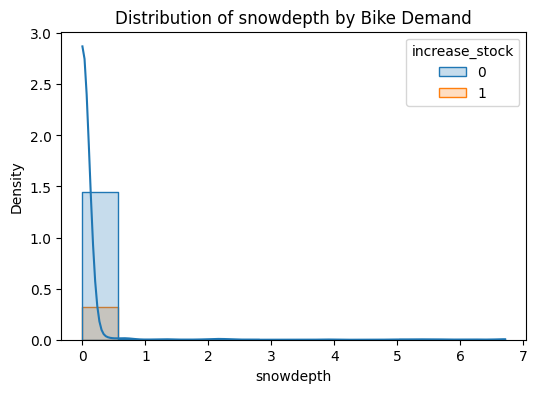

In [39]:
# Demand vs Weather features (Did not include snow as all is zero)
weather_features = ['temp', 'humidity', 'windspeed', 'cloudcover', 'visibility' ,'precip', 'snowdepth']
for feat in weather_features:
    plt.figure(figsize=(6,4))
    sb.histplot(data=df, x=feat, hue='increase_stock', kde=True, stat='density', element='step')
    plt.title(f"Distribution of {feat} by Bike Demand")
    plt.show()

Carry out scaling to make the graph more visible


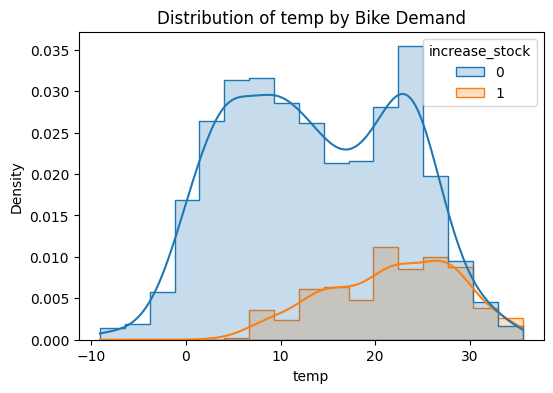

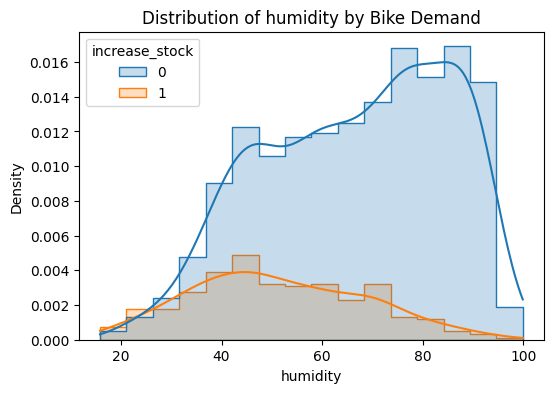

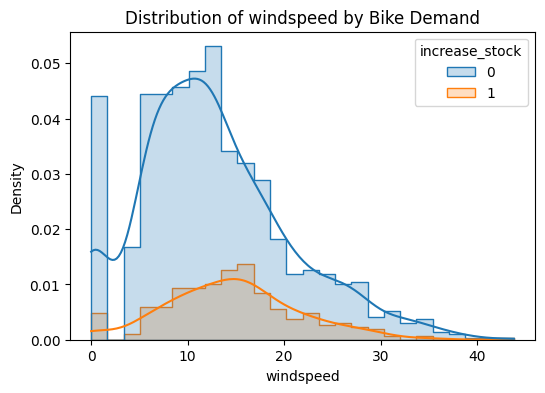

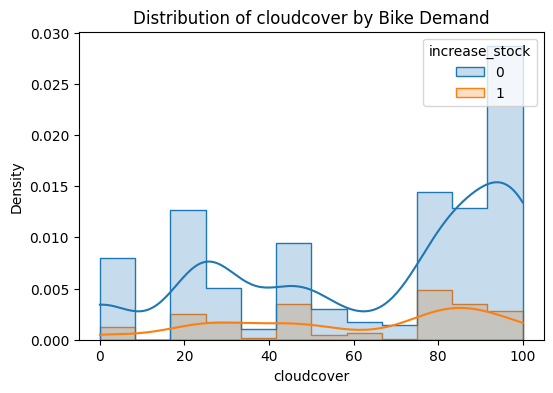

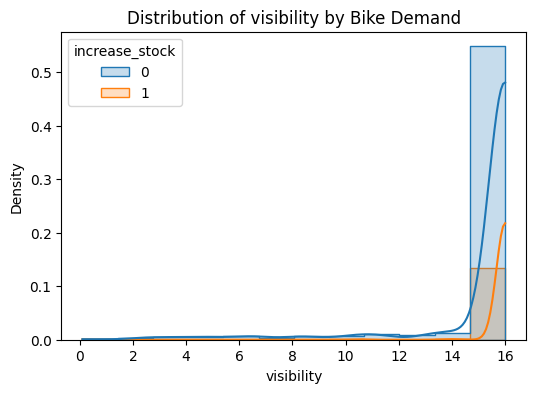

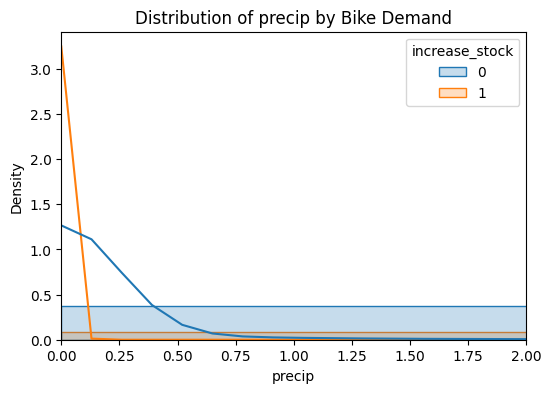

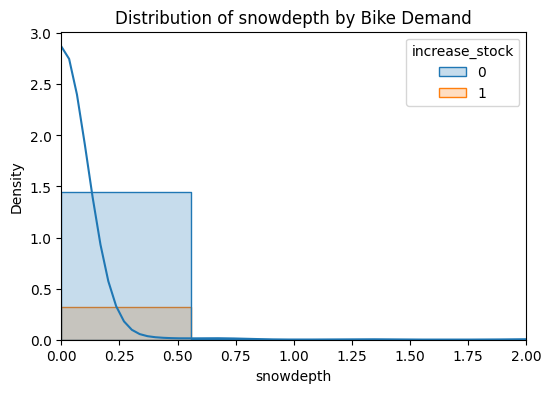

In [40]:
# Demand vs Weather features (Did not include snow as all is zero)
weather_features = ['temp', 'humidity', 'windspeed', 'cloudcover', 'visibility' ,'precip' , 'snowdepth']
for feat in weather_features:
    plt.figure(figsize=(6,4))
    sb.histplot(data=df, x=feat, hue='increase_stock', kde=True, stat='density', element='step')
    plt.title(f"Distribution of {feat} by Bike Demand")
    
    # Zoom in on precipitation to make differences more visible
    if feat == 'precip':
        # Get the 95th percentile to exclude extreme outliers
        upper_limit = df['precip'].quantile(0.95)
        plt.xlim(0, max(upper_limit, 2))  # Set x-axis limit to 95th percentile or at least 2
        
    if feat == 'snowdepth':
        # Get the 95th percentile to exclude extreme outliers
        upper_limit = df['precip'].quantile(0.95)
        plt.xlim(0, max(upper_limit, 2))  # Set x-axis limit to 95th percentile or at least 2
    plt.show()

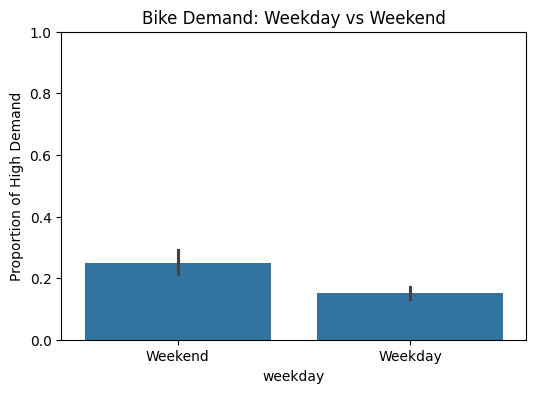

In [41]:
# Weekday vs Weekend comparison
if 'weekday' in df.columns:
    plt.figure(figsize=(6,4))
    sb.barplot(x='weekday', y='increase_stock', data=df, estimator=lambda x: sum(x)/len(x))
    plt.title("Bike Demand: Weekday vs Weekend")
    plt.xticks([0,1], ['Weekend', 'Weekday'])
    plt.ylabel("Proportion of High Demand")
    plt.ylim(0, 1)
    plt.show()

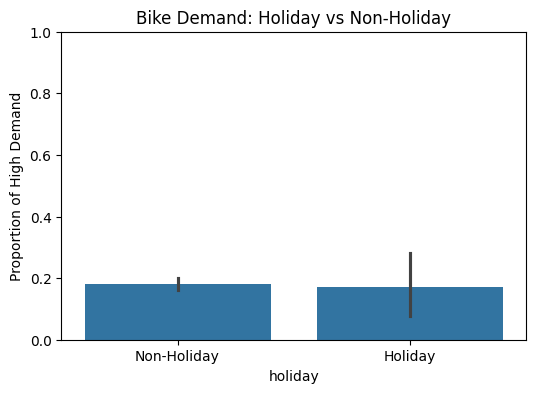

In [42]:
# Holiday vs Non-Holiday comparison
if 'holiday' in df.columns:
    plt.figure(figsize=(6,4))
    sb.barplot(x='holiday', y='increase_stock', data=df, estimator=lambda x: sum(x)/len(x))
    plt.title("Bike Demand: Holiday vs Non-Holiday")
    plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
    plt.ylabel("Proportion of High Demand")
    plt.ylim(0, 1)
    plt.show()

In [43]:
from scipy import stats

# Filter data for holidays and non-holidays
non_holiday = df[df['holiday'] == 0]['increase_stock']
holiday = df[df['holiday'] == 1]['increase_stock']

# Convert to numeric (assuming 'increase_stock' is 0/1 or categorical)
non_holiday_numeric = pd.to_numeric(non_holiday, errors='coerce')
holiday_numeric = pd.to_numeric(holiday, errors='coerce')

# Descriptive statistics
print("=== Descriptive Statistics ===")
print(f"Non-Holiday: Mean = {non_holiday_numeric.mean():.4f}, n = {len(non_holiday)}")
print(f"Holiday: Mean = {holiday_numeric.mean():.4f}, n = {len(holiday)}")
print(f"Difference: {abs(non_holiday_numeric.mean() - holiday_numeric.mean()):.4f}\n")

# Value counts
print("Non-Holiday distribution:")
print(non_holiday.value_counts())
print("\nHoliday distribution:")
print(holiday.value_counts())

# Chi-square test (for categorical outcome)
contingency_table = pd.crosstab(df['holiday'], df['increase_stock'])
print("\n=== Contingency Table ===")
print(contingency_table)

chi2, p_value_chi, dof, expected = stats.chi2_contingency(contingency_table)

print("\n=== Chi-Square Test ===")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value_chi:.4f}")
print(f"Degrees of freedom: {dof}")

# Interpretation
print("\n=== Interpretation ===")
alpha = 0.05
if p_value_chi > alpha:
    print(f"P-value ({p_value_chi:.4f}) > {alpha}: No significant difference between holiday and non-holiday")
else:
    print(f"P-value ({p_value_chi:.4f}) ≤ {alpha}: Significant difference exists")

=== Descriptive Statistics ===
Non-Holiday: Mean = 0.1803, n = 1547
Holiday: Mean = 0.1698, n = 53
Difference: 0.0105

Non-Holiday distribution:
increase_stock
0    1268
1     279
Name: count, dtype: int64

Holiday distribution:
increase_stock
0    44
1     9
Name: count, dtype: int64

=== Contingency Table ===
increase_stock     0    1
holiday                  
0               1268  279
1                 44    9

=== Chi-Square Test ===
Chi-square statistic: 0.0002
P-value: 0.9884
Degrees of freedom: 1

=== Interpretation ===
P-value (0.9884) > 0.05: No significant difference between holiday and non-holiday


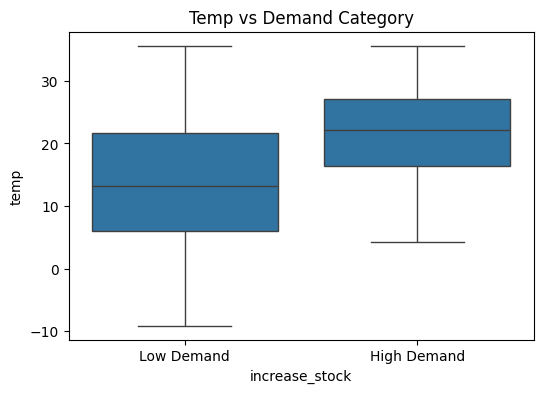

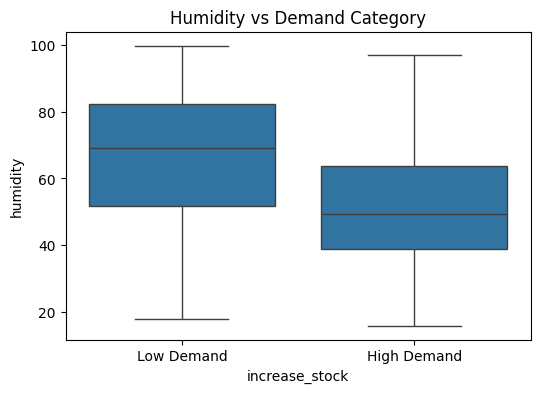

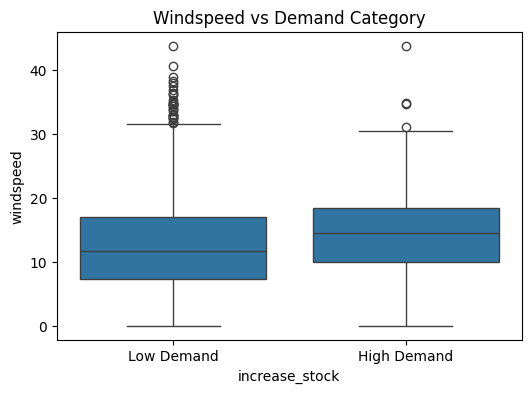

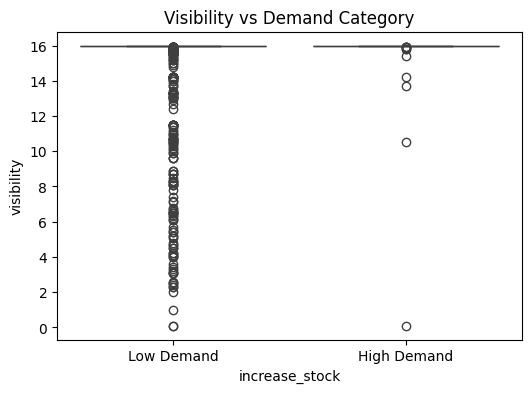

In [44]:
# Boxplots for weather patterns by demand 
weather_box = ['temp', 'humidity', 'windspeed', 'visibility']
for col in weather_box:
    plt.figure(figsize=(6,4))
    sb.boxplot(x='increase_stock', y=col, data=df)
    plt.title(f"{col.capitalize()} vs Demand Category")
    plt.xticks([0,1], ['Low Demand', 'High Demand'])
    plt.show()

In [49]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, 
                            roc_auc_score, roc_curve, precision_recall_curve, f1_score)
RANDOM_STATE = 54


In [50]:
# Using df_model to do the machine learning after cleaning the data
df_model = df

# Convert categorical to codes for machine learning
cols_to_convert = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'increase_stock']
df[cols_to_convert] = df[cols_to_convert].astype('int64')

# Separating features and target
X = df_model.drop(columns=['increase_stock'])
y = df_model['increase_stock'].astype(int)

# Train/test plit used across all machine learning components
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=54,       # FIXED SEED
    stratify=y             # keeps same proportion of classes
)


Baseline model using dummy classifier.

In [51]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train,y_train)

y_pred = dummy.predict(X_test)

acc_baseline  = accuracy_score(y_test, y_pred)
prec_baseline = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
rec_baseline  = recall_score(y_test, y_pred, pos_label=1)
f1_baseline   = f1_score(y_test, y_pred, pos_label=1)
cm_baseline  = confusion_matrix(y_test, y_pred)

print("BASELINE MODEL")
print(f"Accuracy : {acc_baseline:.3f}")
print(f"Precision: {prec_baseline:.3f}")
print(f"Recall   : {rec_baseline:.3f}")
print(f"F1-score : {f1_baseline:.3f}")


cr = classification_report(y_test,y_pred)

print(cr)

BASELINE MODEL
Accuracy : 0.819
Precision: 0.000
Recall   : 0.000
F1-score : 0.000
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       262
           1       0.00      0.00      0.00        58

    accuracy                           0.82       320
   macro avg       0.41      0.50      0.45       320
weighted avg       0.67      0.82      0.74       320



C:\Users\denni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\denni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\denni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

Here we can see that the baseline is accurate with 0.82 when simply guesssing for low demand, but misses all of the high demand options

Linear discriminant analysis